## Tarea - Identificación, tratamiento y manejo de Missing Values

### Enunciado tarea para subir a Github
Toma el dataset con nombre ejercicio_Missing_Values.xlsx y logra obtener un set de datos analizable.
Para ello, utiliza las diferentes estrategias de manejo de Missing Values que has aprendido y ve justificando la aplicación de tus pasos para cada operación en el notebook.

Consideraciones y pistas:
- Habrá Missing Values que tendrás que rellenar teniendo en cuenta su contexto
- Para la columna Consumidorx Alcohol Esporádico consideraremos  el valor “NO” cada vez que encontremos un valor faltante.
- Consideraremos que una persona entre 0 y 12 años no puede generar ingresos.
- ¿Puede unx niñx estar casada por debajo de los 16 años?
- ¿Hay algún símbolo especial que podamos considerar como Missing Value?
- ¿Cuántos únicos tiene cada columna?
- Verás que tu dataset está bastante sucio. Que habrá manejo de datos que esperas de una forma y serán más incómodos de lo que piensas. Pero esta también es la realidad de unx analista de datos. 😊

Finalmente, realiza algún análisis que se te ocurra. Ideas:
- Graficar estatura media por rangos de edad (de 10 en 10) y género
- Proporciones de vacunados por género, por provincia
- Correlación Estatura Pesom

In [1]:
#!pip install missingno --user

In [2]:
import pandas as pd

df= pd.read_excel('ejercicio_Missing_Values.xlsx')
df

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NaN,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,39455398W,1.0,78.0,10.0,SÍ,NaN,NaN,NO,NO,NaN,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN
66,Antonio,Elizalde,Martin,H,Colmenar Viejo,Madrid,39455398W,8.0,125.0,25.0,NO,0.0,Solter/x,SI,NO,NaN,4411125322A
67,Ángel,Guerrero,Alonso,H,Puertollano,Ciudad Real,60423158L,9.0,135.0,30.0,SÍ,0.0,Solter/x,SI,NO,NaN,NaN


Podemos usar la función isnull() y sumar los valores nulos por columna

In [3]:
df.isnull().sum()

Nombre                             2
Apellido 1                         2
Apellido 2                         2
Sexo                               2
Municipio                          5
Provincia                          4
NIF                               11
Edad                               2
Estatura                          12
Masa                              13
Hijos                              6
Ingresos                           7
Estado Civil                       8
Vacunadx                           5
CARNÉ CONDUCIR                    10
Consumidorx Alcohol Esporádico    43
REFERENCIA ESTUDIO                 5
dtype: int64

## Use of na_values parameter in read_excel() function of Pandas in Python

* **read_excel()** is an important pandas function to read excel files. But there are many other things one can do through this function only to change the returned object completely. 

* **na_values:** This is used to create a string that considers pandas as NaN (Not a Number). by-default pandas consider #N/A, -NaN, -n/a, N/A, NULL etc as NaN value.

Si usamos una lista **treat_NaNs** proporcionada por **theegg** para cambiar todos los valores del df que estén presentes en la misma por un valor nulo:

In [4]:
treat_NaNs = [" ","",".","-","._",",",";",":","''","'","/","?","!","[]","#",
"´","&","$","()","{}","ç","Ç","`","^","*","+","|","%","n/a","N/A","--","NA","na"]

df= pd.read_excel('ejercicio_Missing_Values.xlsx', na_values = treat_NaNs)
df

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NaN,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,39455398W,1.0,78.0,10.0,SÍ,NaN,NaN,NO,NO,NaN,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN
66,Antonio,Elizalde,Martin,H,Colmenar Viejo,Madrid,39455398W,8.0,125.0,25.0,NO,0.0,Solter/x,SI,NO,NaN,4411125322A
67,Ángel,Guerrero,Alonso,H,Puertollano,Ciudad Real,60423158L,9.0,135.0,30.0,SÍ,0.0,Solter/x,SI,NO,NaN,NaN


In [5]:
# Definimos una función para hallar el % de valores missing

def perc_miss(data):
    
    s_perc_miss = data.isnull().sum()*100/len(df)

    s_perc_miss = round(s_perc_miss, 2)

    return s_perc_miss.to_frame(name = '% Missing value percentage'), s_perc_miss.plot.bar(title = '% Missing Values per column', ylabel = '% Missing Values')
    


(                                % Missing value percentage
 Nombre                                                2.90
 Apellido 1                                            2.90
 Apellido 2                                            2.90
 Sexo                                                  4.35
 Municipio                                             7.25
 Provincia                                             5.80
 NIF                                                  15.94
 Edad                                                  2.90
 Estatura                                             17.39
 Masa                                                 18.84
 Hijos                                                 8.70
 Ingresos                                             10.14
 Estado Civil                                         11.59
 Vacunadx                                              7.25
 CARNÉ CONDUCIR                                       14.49
 Consumidorx Alcohol Esporádico         

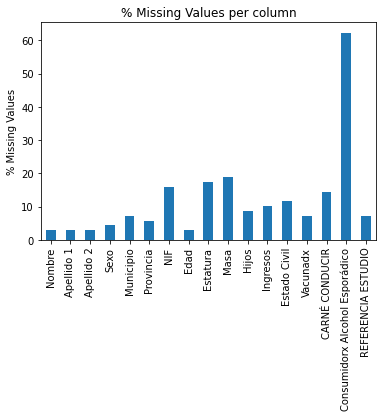

In [6]:
perc_miss(df)

In [7]:
# el método info nos da información inicial sobre el dataset, representando las columnas, 
# el número de valores NO MISSSING y el tipo de columna. 
df.info(memory_usage='deep') #deep nos indica cuánto ocupa el dataset en memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nombre                          67 non-null     object 
 1   Apellido 1                      67 non-null     object 
 2   Apellido 2                      67 non-null     object 
 3   Sexo                            66 non-null     object 
 4   Municipio                       64 non-null     object 
 5   Provincia                       65 non-null     object 
 6   NIF                             58 non-null     object 
 7   Edad                            67 non-null     float64
 8   Estatura                        57 non-null     float64
 9   Masa                            56 non-null     float64
 10  Hijos                           63 non-null     object 
 11  Ingresos                        62 non-null     float64
 12  Estado Civil                    61 non

Podemos también saber los valores nulos por filas y ordenarlos para ver en qué filas faltan más valores

In [8]:
df.isnull().sum(axis = 1).sort_values().tail(10)

39     3
50     4
56     4
6      5
62     5
55     5
26     6
65     7
35    17
17    17
dtype: int64

Vemos que hay dos filas vacías (filas donde el número de missing values es igual al número de columnas), después de comprobarlo estas filas las podemos eliminar

In [9]:
# Eliminamos las dos filas (35 y 17) que están vacías

df.drop(index = [17, 35], inplace = True)

In [10]:
import missingno as msno

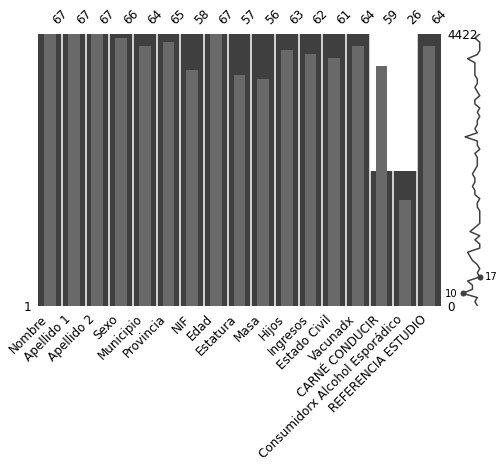

In [11]:
msno.matrix(df,figsize=(8,5), fontsize=12); #en blanco, cada missing value
msno.bar(df, figsize=(8,5), fontsize=12); 

In [12]:
# Para la columna Consumidorx Alcohol Esporádico consideraremos el valor “NO” cada vez que encontremos un valor faltante 
# para ello usamos la función fillna sobre esa columna

df['Consumidorx Alcohol Esporádico'] = df['Consumidorx Alcohol Esporádico'].fillna("NO")


In [13]:
# Podemos rellenar algunos de los valores nulos de la columna CARNÉ CONDUCIR si buscamos las personas menores de 18 años
# también podemos asumir que las personas mayores de 100 no tienen carné

df[(df['CARNÉ CONDUCIR'].isnull()) & (df['Edad']<18) | (df['CARNÉ CONDUCIR'].isnull()) & (df['Edad']>100)]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
8,Antonio,Morante,Molina,H,Candelaria,S.C. de Tenerife,35261507M,110.0,145.0,70.0,SÍ,2312.5,Solter/x,SI,NaN,NO,4411125322A
36,Josefa,Ferrer,Salado,M,Olesa de Montserrat,Barcelona,39455398W,6.0,112.0,20.0,SÍ,0.0,NaN,SI,NaN,NO,4411125322A
37,Cristina,Acosta,Mateo,M,Oviedo,Asturias,06708146N,4.0,104.0,16.8,NO,0.0,Solter/x,No,NaN,NO,4411125322A
38,Ana,Peña,Sánchez,M,Cabra,Córdoba,55261507M,7.0,122.0,28.0,NO,0.0,Solter/x,No,NaN,NO,4411125322A


In [14]:
# Rellenamos la columna CARNÉ DE CONDUCIR de estos registros con NO

df.loc[[8, 36, 37, 38],'CARNÉ CONDUCIR'] = 'NO'

In [15]:
#localizamos el único registro que tiene un valor nulo en la columna Sexo

df[df['Sexo'].isnull()]


,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
30,María Teresa,Marrero,Fernández,NaN,Sabadell,Barcelona,39455398W,23.0,169.0,66.0,SÍ,1945.2,Solter/x,No,SÍ,NO,4411125322A


In [16]:
# Podemos asignar al registro 30 con nombre María Teresa el valor M en Sexo

df.loc[30, 'Sexo'] = 'M'

In [17]:
# Comprobamos valores missing de otras columnas

df[df['Municipio'].isnull()]


,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.0,Divorciad/x,No,SÍ,SÍ,4411125322A
20,Concepción,Cobos,Díaz,M,NaN,Madrid,81971380R,56.0,156.0,49.0,NO,1325.0,Casad/x,No,NO,SÍ,4411125322A
26,María Teresa,Romero,Nieves,M,NaN,NaN,NaN,78.0,NaN,NaN,NO,1751.6,Solter/x,No,SÍ,NO,4411125322A


In [18]:
df[df['Provincia'].isnull()]


,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.0,Divorciad/x,No,SÍ,SÍ,4411125322A
26,María Teresa,Romero,Nieves,M,NaN,NaN,NaN,78.0,NaN,NaN,NO,1751.6,Solter/x,No,SÍ,NO,4411125322A


In [19]:
#Podemos eliminar estos registros, ya que presentan bastantes valores nulos que no podemos inputar por el contexto

df.drop(index=[6, 20, 26],  inplace = True)

In [20]:
df.isnull().sum()

Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              0
Municipio                         0
Provincia                         0
NIF                               8
Edad                              0
Estatura                          8
Masa                              9
Hijos                             3
Ingresos                          5
Estado Civil                      6
Vacunadx                          3
CARNÉ CONDUCIR                    4
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                3
dtype: int64

In [21]:
# Echamos un vistazo a los registros con valores nulos en las columna Hijos

df[df['Hijos'].isnull()]


,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
55,María Carmen,Ordoñez,Ortega,M,Madrid,Madrid,33614346V,3.0,90.0,15.0,NaN,NaN,NaN,NaN,NO,NO,4411125322A
62,María Carmen,Romano,Abellán,M,Irun,Guipúzcoa,39455398W,3.0,94.0,14.7,NaN,NaN,NaN,NaN,NO,NO,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NO,NO,NaN


In [22]:
# Podemos rellanar los datos de las columnas Hijos, Ingresos, Estado Civil de estos registros atendiendo a la edad

df.loc[[55, 62, 65] , ['Hijos', 'Ingresos', 'Estado Civil']] = ['NO', '0.0', 'Solter/x']

df.loc[[24, 36, 64], ['Estado Civil']] = 'Solter/x'

In [23]:
df.isnull().sum()

Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              0
Municipio                         0
Provincia                         0
NIF                               8
Edad                              0
Estatura                          8
Masa                              9
Hijos                             0
Ingresos                          2
Estado Civil                      0
Vacunadx                          3
CARNÉ CONDUCIR                    4
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                3
dtype: int64

In [24]:
# Podemos visualizar sólo aquellos registros del df con algún valor nulo

df[df.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NO,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,06708146N,78.0,165.0,66.0,SÍ,2150.0,Divorciad/x,No,NaN,NO,4411125322A
9,Jesús,López,Núñez,H,Cartagena,Murcia,NaN,2.0,88.0,13.0,NO,0.0,Solter/x,SI,NO,NO,4411125322A
10,Juan,Sanz,Hernández,H,Rentería,Guipúzcoa,NaN,22.0,165.0,72.0,SÍ,950.0,Solter/x,SI,SÍ,NO,4411125322A
11,Jordi,Martínez,Valdés,H,Marín,Pontevedra,35614346V,22.0,163.0,70.0,NO,900.0,Divorciad/x,No,NaN,SÍ,4411125322A
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,79455398W,45.0,171.0,60.0,SÍ,NaN,Solter/x,No,SÍ,NO,4411125322A
16,José,López,Doncel,H,San Vicente del Raspeig,Alicante,NaN,5.0,110.0,18.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
18,Alejandro,León,Herranz,H,Barcelona,Barcelona,NaN,18.0,188.0,89.0,SÍ,1812.0,Solter/x,No,NO,NO,4411125322A
34,Emilio,Montes,Segura,H,Las Palmas de G. C.,Las Palmas,04614346V,18.0,NaN,NaN,NO,955.0,Solter/x,No,NO,SÍ,4411125322A
39,Manuel,Ramírez,Carrasco,H,Móstoles,Madrid,NaN,78.0,NaN,NaN,SÍ,783.2,Casad/x,No,NO,SÍ,4411125322A


In [25]:
# Vemos que hay muchos registros sin datos en la columna NIF
# Supongamos que la columna NIF en este análisis no es importante y la puedo eliminar

df.drop(['NIF'], axis = 1, inplace = True)

In [26]:
# Comprobamos que la columna NIF ha sido eliminada

df.head()

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NO,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A


In [27]:
# Podemos rellenar los valores de la columna REFERENCIA ESTUDIO después de comprobar que hay un único valor y asumiendo que
# todos los participantes pertenencen al mismo estudio

df['REFERENCIA ESTUDIO'].unique()

array(['4411125322A', nan], dtype=object)

In [28]:
df.loc[[65, 67, 68], 'REFERENCIA ESTUDIO'] = '4411125322A'

In [29]:
# Echamos un vistazo a los registros con más valores nulos

df.isnull().sum(axis = 1).sort_values().tail(20)

22    0
27    0
21    0
19    0
11    1
1     1
7     1
55    1
13    1
62    1
64    1
63    2
65    2
41    2
57    2
52    2
50    2
39    2
34    2
56    3
dtype: int64

In [30]:
# El registro 56 sigue teniendo 3 valoresa nulos

df.drop(56, inplace = True)

df

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NO,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,1.0,78.0,10.0,SÍ,NaN,Solter/x,NO,NO,NO,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,2.0,86.0,NaN,NO,0.0,Solter/x,NaN,NO,NO,4411125322A
66,Antonio,Elizalde,Martin,H,Colmenar Viejo,Madrid,8.0,125.0,25.0,NO,0.0,Solter/x,SI,NO,NO,4411125322A
67,Ángel,Guerrero,Alonso,H,Puertollano,Ciudad Real,9.0,135.0,30.0,SÍ,0.0,Solter/x,SI,NO,NO,4411125322A


In [31]:
df[df.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NO,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,78.0,165.0,66.0,SÍ,2150.0,Divorciad/x,No,NaN,NO,4411125322A
11,Jordi,Martínez,Valdés,H,Marín,Pontevedra,22.0,163.0,70.0,NO,900.0,Divorciad/x,No,NaN,SÍ,4411125322A
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,45.0,171.0,60.0,SÍ,NaN,Solter/x,No,SÍ,NO,4411125322A
34,Emilio,Montes,Segura,H,Las Palmas de G. C.,Las Palmas,18.0,NaN,NaN,NO,955.0,Solter/x,No,NO,SÍ,4411125322A
39,Manuel,Ramírez,Carrasco,H,Móstoles,Madrid,78.0,NaN,NaN,SÍ,783.2,Casad/x,No,NO,SÍ,4411125322A
41,Iñigo,García,Gómez,H,Tarrasa,Barcelona,45.0,NaN,NaN,SÍ,713.257143,Solter/x,No,SÍ,SÍ,4411125322A
50,Carmen,Moral,Giménez,M,Coslada,Madrid,39.0,NaN,NaN,NO,1945.2,Solter/x,SI,NO,NO,4411125322A
52,Sergio,Sánchez,Palacio,H,Águilas,Murcia,41.0,NaN,NaN,NO,1945.2,Solter/x,SI,NO,SÍ,4411125322A
55,María Carmen,Ordoñez,Ortega,M,Madrid,Madrid,3.0,90.0,15.0,NO,0.0,Solter/x,NaN,NO,NO,4411125322A


In [32]:
#Podrían completarse los datos de Estatura y Masa faltantes con datos de diferentes fuentes como INE usando la estatura media
#y el peso medio de hombres y mujeres por franja de edad. Supongamos que la media de altura para mujeres de 30 a 50 años es de 
# 1.64 cm y el peso 62 kg, de esta manera podemos rellenar los valores de los registros 50, 57 y 63

df.loc[[50, 57, 63], ['Estatura', 'Masa']] = [164.0, 62]

In [33]:
df[df.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NO,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,78.0,165.0,66.0,SÍ,2150.0,Divorciad/x,No,NaN,NO,4411125322A
11,Jordi,Martínez,Valdés,H,Marín,Pontevedra,22.0,163.0,70.0,NO,900.0,Divorciad/x,No,NaN,SÍ,4411125322A
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,45.0,171.0,60.0,SÍ,NaN,Solter/x,No,SÍ,NO,4411125322A
34,Emilio,Montes,Segura,H,Las Palmas de G. C.,Las Palmas,18.0,NaN,NaN,NO,955.0,Solter/x,No,NO,SÍ,4411125322A
39,Manuel,Ramírez,Carrasco,H,Móstoles,Madrid,78.0,NaN,NaN,SÍ,783.2,Casad/x,No,NO,SÍ,4411125322A
41,Iñigo,García,Gómez,H,Tarrasa,Barcelona,45.0,NaN,NaN,SÍ,713.257143,Solter/x,No,SÍ,SÍ,4411125322A
52,Sergio,Sánchez,Palacio,H,Águilas,Murcia,41.0,NaN,NaN,NO,1945.2,Solter/x,SI,NO,SÍ,4411125322A
55,María Carmen,Ordoñez,Ortega,M,Madrid,Madrid,3.0,90.0,15.0,NO,0.0,Solter/x,NaN,NO,NO,4411125322A
62,María Carmen,Romano,Abellán,M,Irun,Guipúzcoa,3.0,94.0,14.7,NO,0.0,Solter/x,NaN,NO,NO,4411125322A


In [34]:
# De la misma manera podemos rellenar los datos de Estatura y Masa de varones con datos estadísticos, teniendo en cuenta la edad

df.loc[[34, 39, 41, 52], ['Estatura']] = [175.0, 170, 175, 175]

df.loc[[34, 39, 41, 52], ['Masa']] = [77.5]

In [35]:
df.loc[[34, 39, 41, 52], ['Estatura']]

,Estatura
34,175.0
39,170.0
41,175.0
52,175.0


In [36]:
df[df.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NO,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,78.0,165.0,66.0,SÍ,2150.0,Divorciad/x,No,NaN,NO,4411125322A
11,Jordi,Martínez,Valdés,H,Marín,Pontevedra,22.0,163.0,70.0,NO,900.0,Divorciad/x,No,NaN,SÍ,4411125322A
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,45.0,171.0,60.0,SÍ,NaN,Solter/x,No,SÍ,NO,4411125322A
55,María Carmen,Ordoñez,Ortega,M,Madrid,Madrid,3.0,90.0,15.0,NO,0.0,Solter/x,NaN,NO,NO,4411125322A
62,María Carmen,Romano,Abellán,M,Irun,Guipúzcoa,3.0,94.0,14.7,NO,0.0,Solter/x,NaN,NO,NO,4411125322A
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,1.0,78.0,10.0,SÍ,NaN,Solter/x,NO,NO,NO,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,2.0,86.0,NaN,NO,0.0,Solter/x,NaN,NO,NO,4411125322A


In [37]:
# Podemos rellenar el valor de Ingresos para el registro 13 teniendo en cuenta la provincia y consultando el salario medio
# por comunidad autónoma en el INE y el registro 64 con el valor medio de pensiones en la comunidad valenciana

df.loc[13, 'Ingresos'] = 2258.30

df.loc[64, 'Ingresos'] = 1039.54


In [38]:
#Si para este estudio no fuese fundamental podemos prescindir de la columna CARNÉ CONDUCIR, ya que por el contexto no podemos
# rellenar los registros de más arriba

df.drop(['CARNÉ CONDUCIR'], axis=1, inplace = True)

In [39]:
df[df.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
55,María Carmen,Ordoñez,Ortega,M,Madrid,Madrid,3.0,90.0,15.0,NO,0.0,Solter/x,NaN,NO,4411125322A
62,María Carmen,Romano,Abellán,M,Irun,Guipúzcoa,3.0,94.0,14.7,NO,0.0,Solter/x,NaN,NO,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,2.0,86.0,NaN,NO,0.0,Solter/x,NaN,NO,4411125322A


In [40]:
# Por último, podría eliminar los registros para los que no tengo información sobre la column Vacunadx

df.drop([55, 62, 65], inplace = True)

In [41]:
df[df.isnull().any(axis="columns")]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO


In [42]:
# Por fin tenemos los datos sin ningún valor faltante, hemos desechado 9 registros y 2 columnas

df.shape

(60, 15)

In [43]:
# Hacemos otro análisis de los datos ya limpios

df.describe().round(2)

,Edad,Estatura,Masa
count,60.00,60.00,60.00
mean,31.17,155.23,61.94
std,22.75,33.39,25.34
min,1.00,13.00,10.00
25%,17.25,148.75,53.25
50%,23.00,165.00,66.00
75%,42.00,177.00,79.00
max,110.00,199.00,122.00


In [44]:
# Si nos fijamos en la columna Estatura el mínimo es un dato erroneo, que debemos corregir, podemos volver a usar la media de 
# de estatura para personas de ese género y edad

df['Estatura'].sort_values().head()

28     13.0
64     78.0
9      88.0
22     92.0
24    101.0
Name: Estatura, dtype: float64

In [45]:
df.drop(28, inplace = True)

In [46]:
#Hacemos una copia del df y lo guardamos como archivo csv

df_clean = df

df_clean.to_csv("ejercicio_Missing_Values_clean.csv")

### Analisis de Datos

Estudio de Estatura y Peso medio por rango de edad y género

In [47]:
# Podemos crear una columna para añadir al dataframe con etiquetas para clasificar las edades por rangos

rangos = []

for i in df_clean['Edad']:
    
    if i>0 and i <=10:
        
        rangos.append(1)
        
        i += 1

    elif i>10 and i <=20:
        
        rangos.append(2)
        
        i +=1
        
    elif i>20 and i <=30:
        
        rangos.append(3)
        
        i +=1
        
    elif i>30 and i <=40:
        
        rangos.append(4)
        
        i +=1
        
    elif i>40 and i <=50:
        
        rangos.append(5)
        
        i +=1
        
    elif i>50 and i <=60:
        
        rangos.append(6)
        
        i +=1
        
    elif i>60 and i <=70:
        
        rangos.append(7)
        
        i +=1
    elif i>70 and i <=80:
        
        rangos.append(8)
        
        i +=1
        
    elif i>80 and i <=90:
        
        rangos.append(9)
        
        i +=1
    elif i>90 and i <=100:
        
        rangos.append(10)
        
        i +=1

    else:
        rangos.append(11)
        
        i +=1        
        
print (rangos)    

[3, 3, 3, 5, 4, 6, 8, 11, 1, 3, 3, 3, 5, 6, 2, 1, 2, 3, 2, 1, 1, 1, 1, 9, 5, 3, 2, 2, 2, 2, 1, 1, 1, 8, 9, 5, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 5, 1, 1, 1, 6]


In [48]:
#Añadimos la columna al df

df_clean['Rango edad']= rangos

### Gráficas de Estatura Media por Rango de Edad y Sexo

In [49]:
# Agrupamos por rango de edad y luego por sexo, calculamos media de la estatura y separamos los datos por sexos para la gráfica

df_est_edad_sexo= df_clean.groupby(['Rango edad', 'Sexo'])['Estatura'].mean().round(2).unstack('Sexo')

In [50]:
df_est_edad_sexo

Sexo,H,M
Rango edad,,
1,104.67,113.33
2,171.33,163.40
3,166.50,166.25
4,179.25,173.57
5,171.40,171.67
6,188.00,172.00
8,167.50,NaN
9,163.00,186.00
11,145.00,NaN


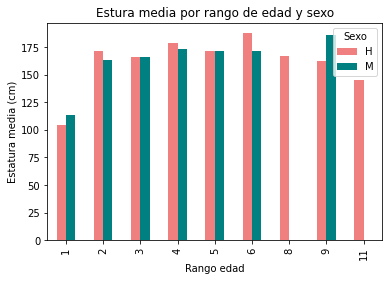

In [51]:
# Graficamos los datos

df_est_edad_sexo.plot.bar(title = 'Estura media por rango de edad y sexo', ylabel = 'Estatura media (cm)', color = ['lightcoral', 'teal']);

### Gráficas de Peso Medio por Rango de Edad y Sexo

In [52]:
# Agrupamos por rango de edad y luego por sexo, calculamos media del peso y separamos los datos por sexos para la gráfica

df_peso_edad_sexo = df_clean.groupby(['Rango edad', 'Sexo'])['Masa'].mean().unstack('Sexo')

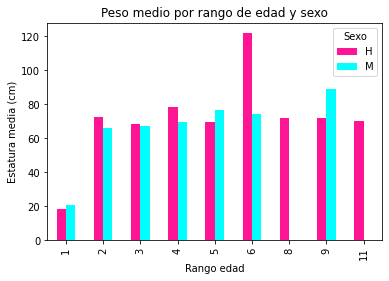

In [53]:
df_peso_edad_sexo.plot.bar(title = 'Peso medio por rango de edad y sexo', ylabel = 'Estatura media (cm)', color = ['deeppink', 'aqua']);

### Gráfica correlación Estatura y Peso para hombres y mujeres

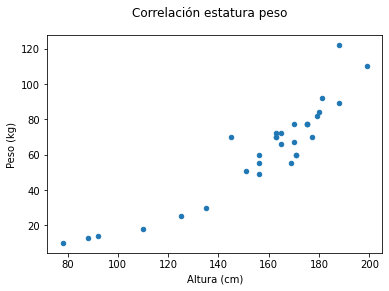

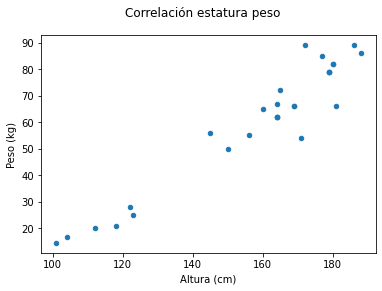

In [54]:
# Agrupamos los datos usando la columna Sexo y enfrentamos la Estatura y la Masa para cada grupo

df_clean.groupby('Sexo').plot.scatter(x='Estatura', y = 'Masa', subplots = True, xlabel = ('Altura (cm)'), ylabel = ('Peso (kg)'), title = ('Correlación estatura peso'));

In [55]:
# Podemos ver los coeficientes de correlación

df_clean.groupby('Sexo')[['Estatura', 'Masa']].corr()

Estatura      Masa
Sexo                             
H    Estatura  1.000000  0.917896
     Masa      0.917896  1.000000
M    Estatura  1.000000  0.960929
     Masa      0.960929  1.000000

### Gráfica % vacunadx por Provincia

In [56]:
# Podemos agrupar los datos por 'Provincia' y por la respuesta en la columna Vacunadx

df_clean.groupby(['Provincia','Vacunadx'])['Vacunadx'].count()



Provincia         Vacunadx
Alicante          No           2
Asturias          No           3
Badajoz           SI           1
Barcelona         No           4
                  SI           3
Ciudad Real       SI           1
Cáceres           No           1
Cádiz             No           1
Córdoba           No           1
Guipúzcoa         No           1
                  SI           2
Islas Baleares    No           1
Jaén              No           1
La Coruña         SI           1
Las Palmas        No           1
Madrid            No          10
                  SI           4
Murcia            SI           2
Málaga            SI           3
Pontevedra        No           1
S.C. de Tenerife  No           1
                  SI           1
Salamanca         SI           1
Sevilla           No           3
                  SI           1
Toledo            SI           1
Valencia          NO           1
                  No           1
                  SI           1
Valladolid      

In [57]:
# Habría que unificar los str de la columna Vacunadx poniéndolos todos en mayúsculas

df_clean['Vacunadx'] = df_clean['Vacunadx'].str.upper()

Si queremos los valores normalizados de vacunados o no por provincia, podemos usar el método value_counts

In [58]:
# Si queremos saber el porcentaje de vacunadx o no por provincia, agrupamos por Provincia y aplicamos el método value_counts
# sobre la columna Vacunadx, luego desdoblamos ese columna con el método unstack

df_vacunados = df_clean.groupby('Provincia')['Vacunadx'].value_counts(normalize=True).round(2).unstack(level = 1)

df_vacunados

Vacunadx,NO,SI
Provincia,,
Alicante,1.00,NaN
Asturias,1.00,NaN
Badajoz,NaN,1.00
Barcelona,0.57,0.43
Ciudad Real,NaN,1.00
Cáceres,1.00,NaN
Cádiz,1.00,NaN
Córdoba,1.00,NaN
Guipúzcoa,0.33,0.67


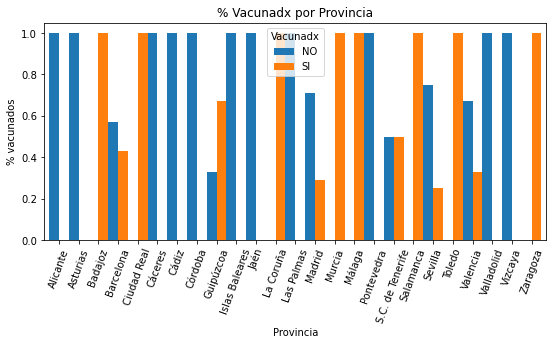

In [59]:
df_vacunados.plot.bar(ylabel = '% vacunados', title = '% Vacunadx por Provincia', width=1.0, figsize = (9,4), rot = 70);